In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,label_binarize,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import fetch_openml

In [138]:
df=pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [140]:
x=df.drop(['Id','Species'],axis=1)
y=df['Species']

In [141]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [142]:
x_scaled_df=pd.DataFrame(data=x_scaled,columns=x.columns)
x_scaled_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [143]:
pca=PCA(n_components=2)


In [144]:
principle_components=pca.fit_transform(x_scaled)

In [145]:
principle_components

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [146]:
principleDF=pd.DataFrame(principle_components,columns=['pc1','pc2'])
principleDF

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [147]:
final_df=pd.concat([principleDF,df[['Species']]],axis=1)
final_df

,pc1,pc2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


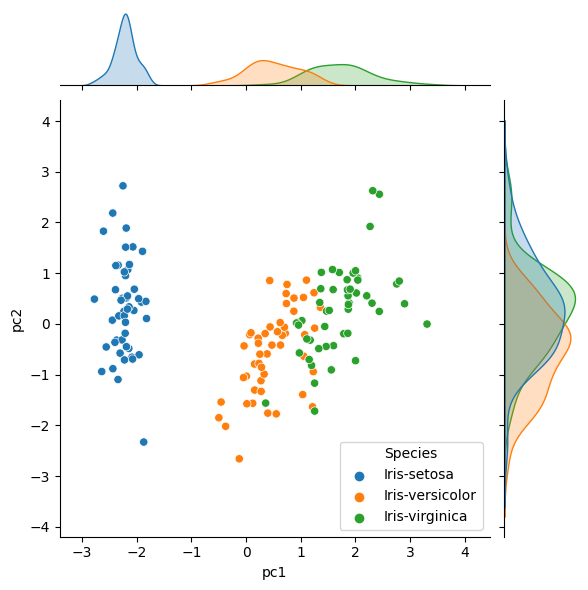

In [148]:
sns.jointplot(x='pc1',y='pc2',data=final_df,hue='Species')

In [149]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [150]:
df=pd.read_excel('/content/Telecom Churn Rate Dataset.xlsx')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0,0,Yes


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [152]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [153]:
df.drop('customerID',axis=1,inplace=True)

In [154]:
df.duplicated().sum()

17

In [155]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [156]:
df.select_dtypes('object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [157]:
df[df.TotalCharges==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,5,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,0,No
1081,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,1,0,No
1339,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,0,No
3324,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,0,No
3818,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,0,No
4371,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,5,0,No
5208,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,0,No
6655,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,No,Two year,No,Mailed check,73.35,,0,0,No


In [158]:
indexes=df[df.TotalCharges==' '].index
df.loc[indexes]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,5,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,0,No
1081,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,1,0,No
1339,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,0,No
3324,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,0,No
3818,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,0,No
4371,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,5,0,No
5208,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,0,No
6655,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,No,Two year,No,Mailed check,73.35,,0,0,No


In [159]:
def map_tot(x):
    if x==' ':
        return np.nan
    return x
df.TotalCharges=df.TotalCharges.apply(map_tot)


In [160]:
indexes=df[df.TotalCharges==' '].index
df.loc[indexes]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn


In [161]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7026 entries, 0 to 7025
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7026 non-null   object 
 1   SeniorCitizen     7026 non-null   int64  
 2   Partner           7026 non-null   object 
 3   Dependents        7026 non-null   object 
 4   tenure            7026 non-null   int64  
 5   PhoneService      7026 non-null   object 
 6   MultipleLines     7026 non-null   object 
 7   InternetService   7026 non-null   object 
 8   OnlineSecurity    7026 non-null   object 
 9   OnlineBackup      7026 non-null   object 
 10  DeviceProtection  7026 non-null   object 
 11  TechSupport       7026 non-null   object 
 12  StreamingTV       7026 non-null   object 
 13  StreamingMovies   7026 non-null   object 
 14  Contract          7026 non-null   object 
 15  PaperlessBilling  7026 non-null   object 
 16  PaymentMethod     7026 non-null   object 


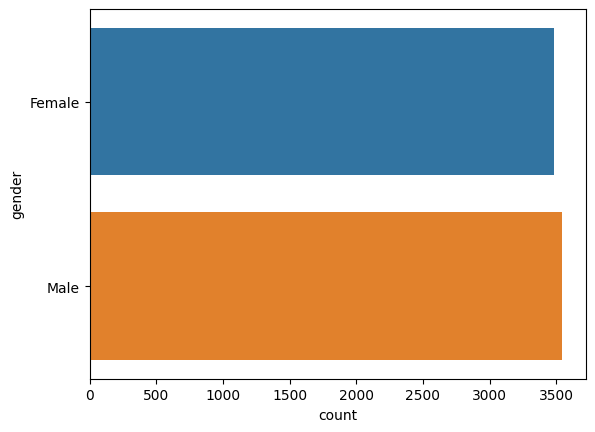

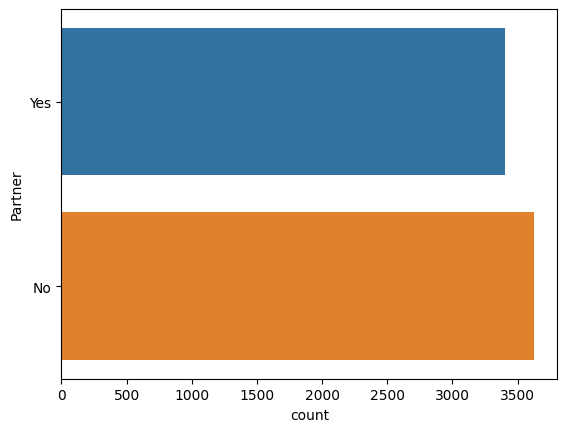

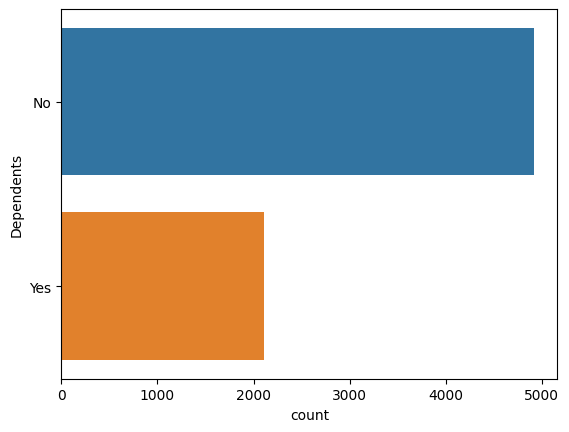

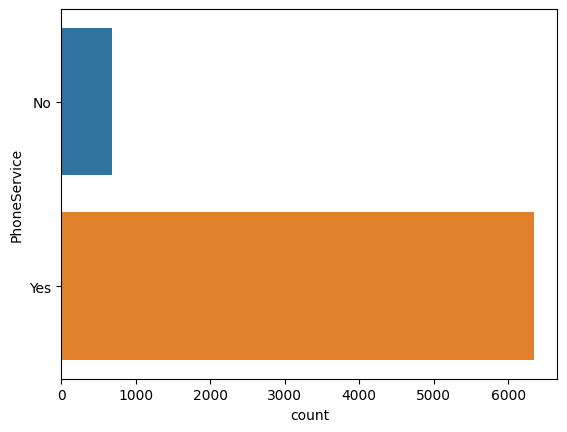

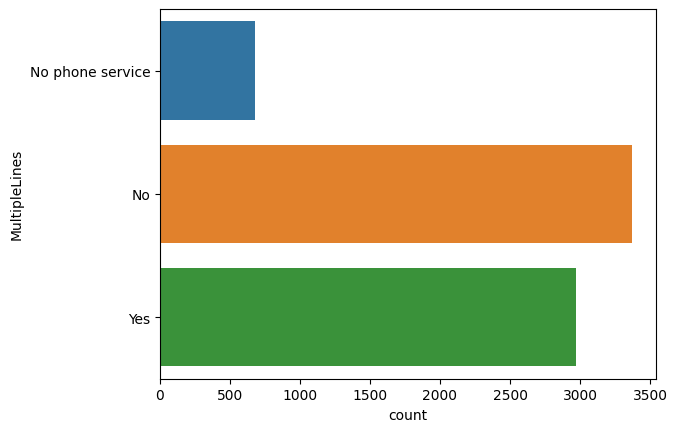

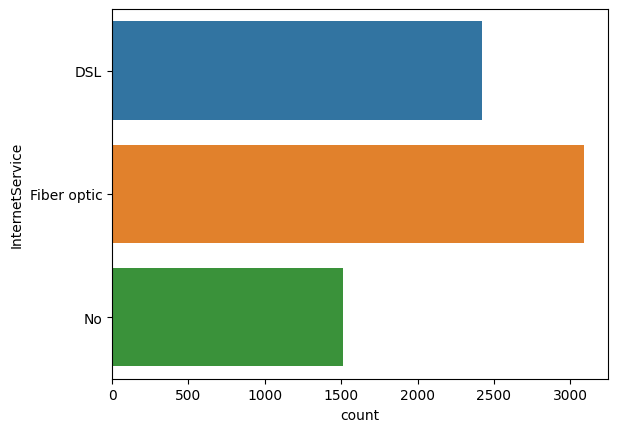

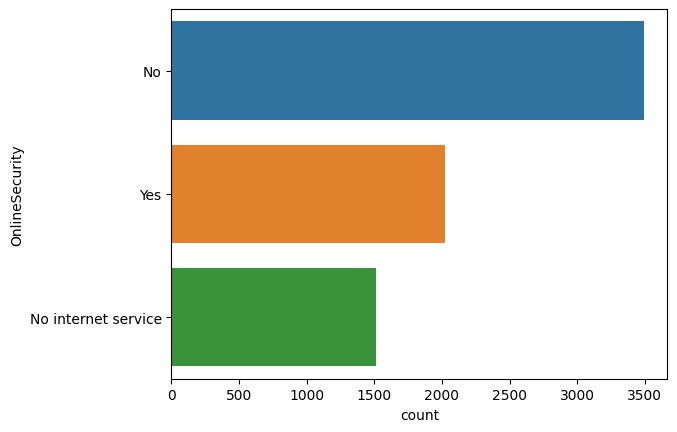

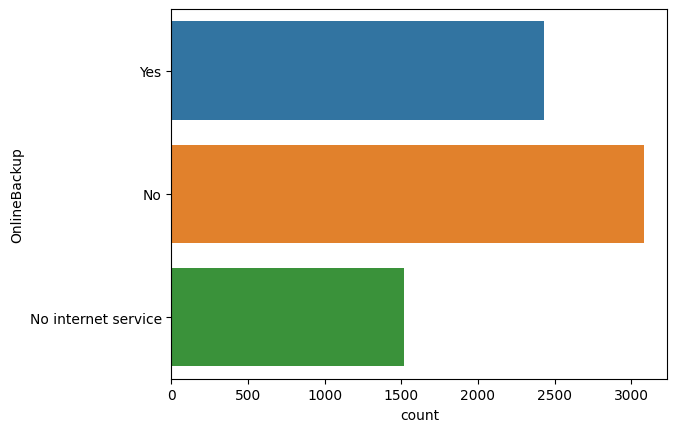

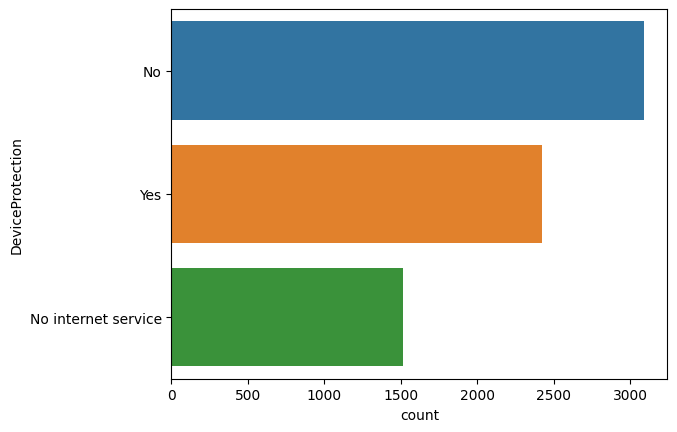

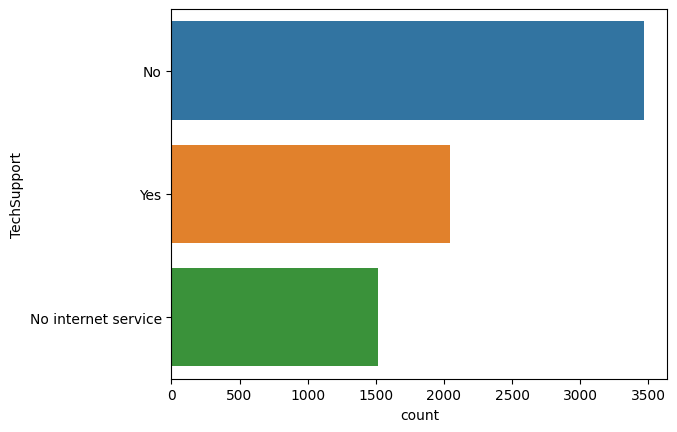

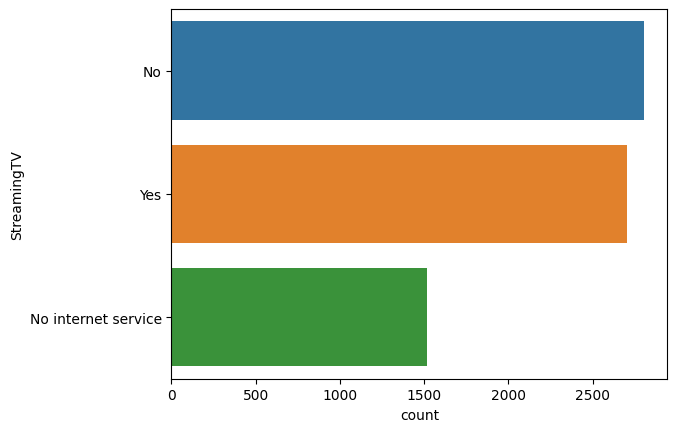

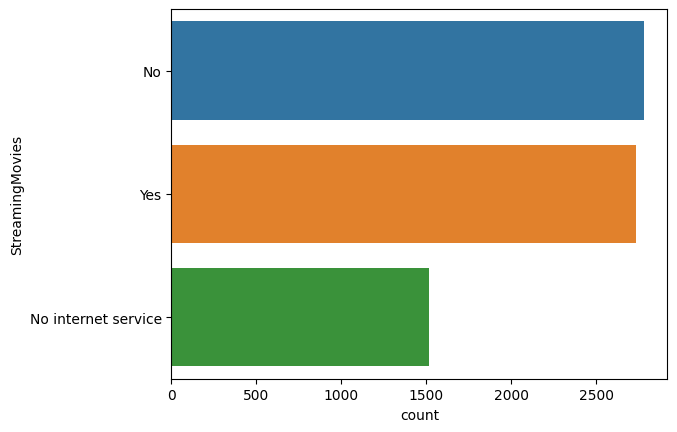

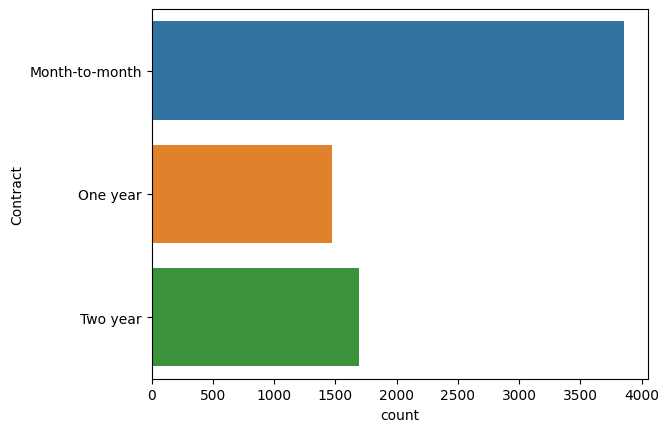

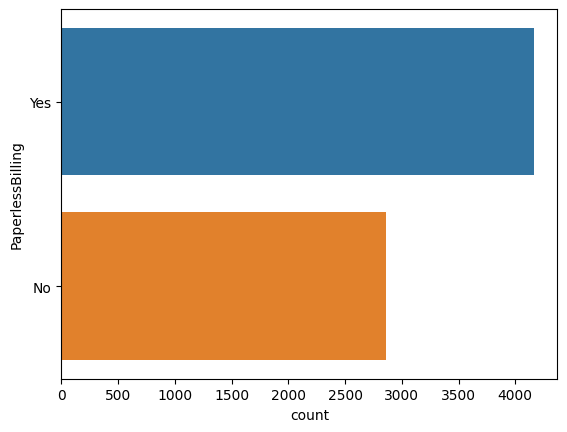

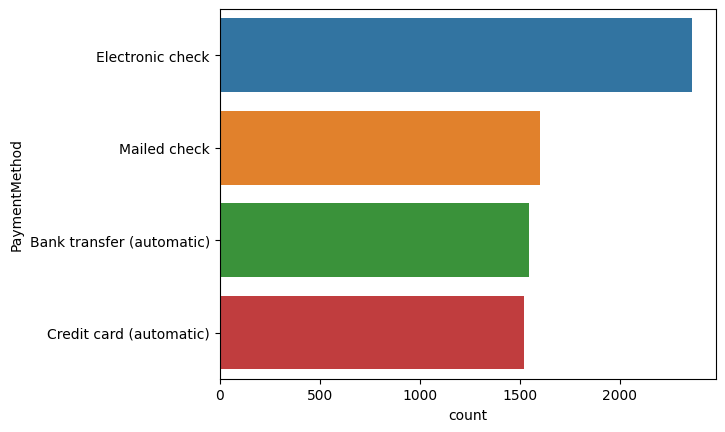

In [163]:
for col in df.select_dtypes('object').columns[:-1]:
    plt.figure()
    sns.countplot(y=df[col])

<Axes: xlabel='Churn', ylabel='count'>

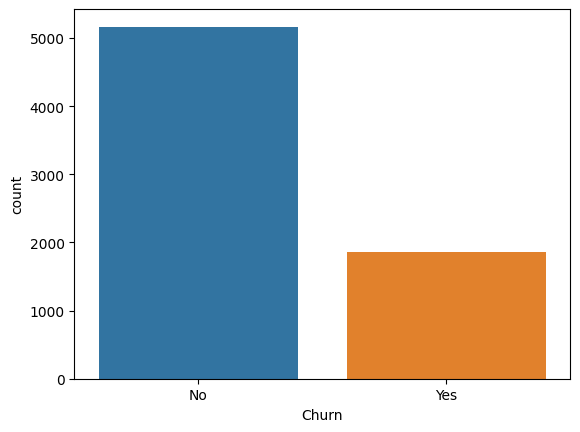

In [164]:
sns.countplot(x=df.Churn)

In [165]:
df.select_dtypes('number').columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'numAdminTickets', 'numTechTickets'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

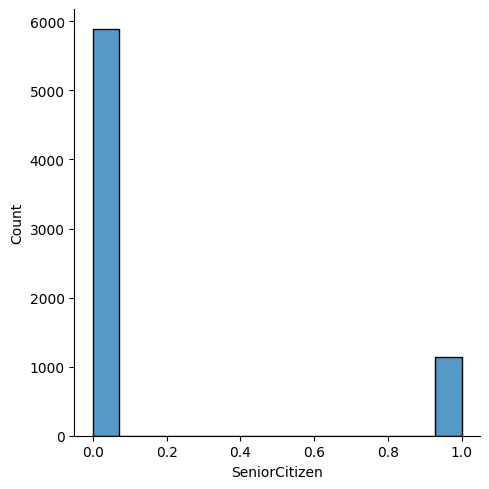

<Figure size 640x480 with 0 Axes>

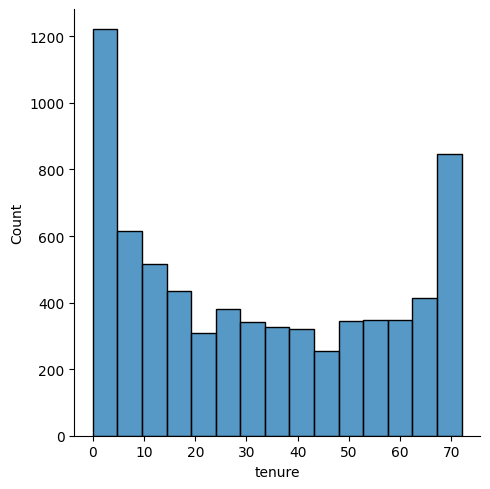

<Figure size 640x480 with 0 Axes>

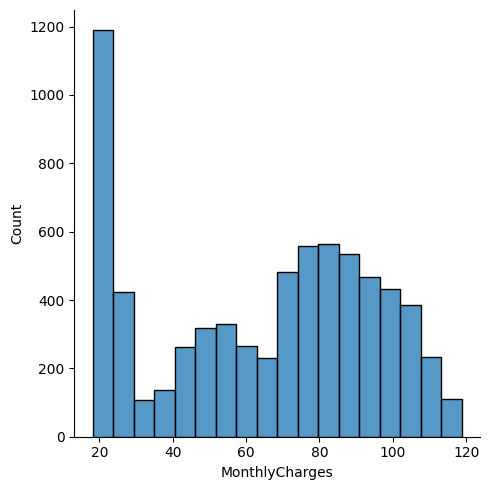

<Figure size 640x480 with 0 Axes>

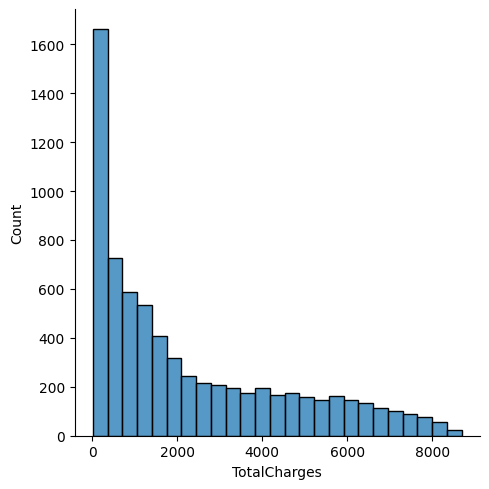

<Figure size 640x480 with 0 Axes>

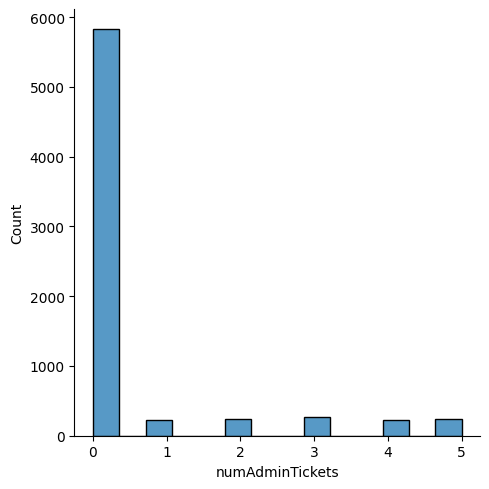

<Figure size 640x480 with 0 Axes>

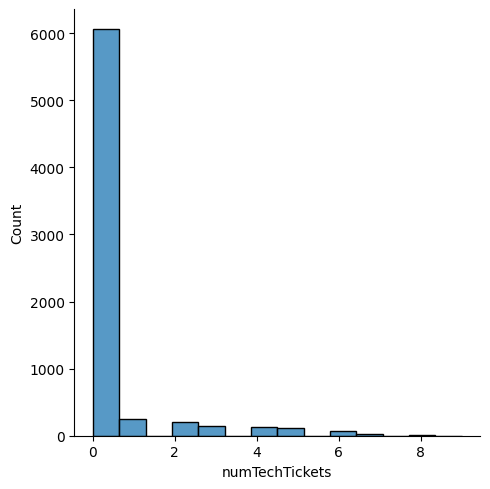

In [166]:
for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.displot(df[col])

In [167]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

In [168]:
df.dropna(axis=1,inplace=True)

In [169]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [170]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,numAdminTickets,numTechTickets,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,0,0,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,0,0,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,3,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,0,0,No
7022,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,0,5,No
7023,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,0,0,No
7024,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,0,0,Yes


In [171]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [172]:
cat_col=x.select_dtypes('object').columns
cat_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [173]:
trans=ColumnTransformer(transformers=[('ohe',OneHotEncoder(sparse=False,drop='first'),cat_col)],
                        remainder='passthrough')

In [174]:
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first', sparse=False),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [175]:
sampler=RandomUnderSampler()
x,y=sampler.fit_resample(x,y)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,numAdminTickets,numTechTickets
0,Male,0,No,No,21,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,0,0
1,Female,0,No,No,20,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.10,0,0
2,Female,0,Yes,Yes,50,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.75,0,0
3,Female,0,Yes,No,52,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),66.25,0,0
4,Female,0,Yes,Yes,33,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,79.15,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,0,0
3716,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,4,0
3717,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,0,0
3718,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,0,7


In [176]:
y.value_counts()

No     1860
Yes    1860
Name: Churn, dtype: int64

In [177]:
pipline=make_pipeline(trans,StandardScaler(),PCA(n_components=15),LogisticRegression())
pipline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=15)),
                ('logisticregression', LogisticRegression())])

In [178]:
scores=cross_validate(estimator=pipline,X=x,y=y,cv=5,return_train_score=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [179]:
scores['train_score'].mean()

0.7985215053763441

In [180]:
scores['test_score'].mean()

0.7970430107526881

In [181]:
scores['fit_time'].mean()

0.199051570892334

In [182]:
without_pca_pipline=make_pipeline(trans,StandardScaler(),LogisticRegression())
without_pca_pipline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [183]:
scores=cross_validate(estimator=without_pca_pipline,X=x,y=y,cv=5,return_train_score=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [184]:
scores['train_score'].mean()

0.8436827956989246

In [185]:
scores['test_score'].mean()

0.8408602150537634

In [186]:
scores['fit_time'].mean()

0.2048187732696533

In [ ]:
mnist=fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.data.shape

In [ ]:
mnist.target.shape

In [ ]:
mnist.target[0]

In [ ]:
x=pd.DataFrame(mnist.data)

In [ ]:
x

In [ ]:
y=pd.DataFrame(mnist.target.values,columns=['Number'])
y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [195]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [196]:
pca=PCA(0.9)


In [197]:
pca.fit(x_train_scaled)

PCA(n_components=0.9)

In [198]:
pca.n_components_

235

In [199]:
x_train_pca=pca.transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)

In [200]:
x_train_pca.shape

(56000, 235)

In [204]:
model=RandomForestClassifier(n_estimators=40)

In [205]:
model.fit(x_train_pca,y_train)

<ipython-input-205-128d5cd66547>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_pca,y_train)


RandomForestClassifier(n_estimators=40)

In [210]:
y_test.values[0]

array(['2'], dtype=object)

In [227]:
x_test_pca[0].reshape(1,-1)

array([[ 2.13695289e+00, -1.61325523e+00,  6.34228107e+00,
         1.72125366e+00, -4.98008074e-02,  6.34864027e+00,
         3.37193898e-01, -1.16068937e+00, -6.76741457e+00,
        -6.68067105e-01, -2.05245126e+00, -1.41786182e+00,
        -6.29255726e+00,  2.62556315e+00,  2.90087133e+00,
        -2.00018191e+00,  1.24968609e+00,  1.55743933e+00,
        -3.99337280e+00, -1.55179425e+00, -2.11181436e+00,
         3.17232008e+00, -3.31156941e+00,  2.09042729e+00,
         7.06535279e-01, -4.50840572e-02,  2.73382482e+00,
        -1.62223704e+00, -6.76975985e-01,  1.76504069e+00,
         5.12165538e-01, -6.77638419e-01,  8.33228303e-01,
        -1.04081549e+00,  1.08946057e+00, -5.39421928e-01,
         1.52223869e+00,  8.74361281e-01,  2.32535848e+00,
         4.91371110e-01,  1.97851245e+00, -9.66774903e-01,
        -1.45053117e+00,  2.63315807e-01, -1.84374902e+00,
         1.85867531e+00,  3.46685915e-02, -1.81765120e+00,
         5.84514923e-01, -4.12216328e-01,  1.19203818e-0

In [228]:
model.predict(x_test_pca[0].reshape(1,-1))

array(['2'], dtype=object)

In [229]:
y_test.iloc[0]

Number    2
Name: 46219, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [230]:
model.predict(x_test_pca[0:10])

array(['2', '6', '0', '4', '2', '3', '2', '1', '0', '5'], dtype=object)

In [232]:
y_test.iloc[0:10].values

array([['2'],
       ['6'],
       ['0'],
       ['4'],
       ['2'],
       ['3'],
       ['2'],
       ['1'],
       ['0'],
       ['5']], dtype=object)

In [233]:
model.score(x_test_pca,y_test)

0.929

In [234]:
import joblib

In [235]:
joblib.dump(model,'model.h5')

['model.h5']